## Loan Prediction

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('LoanDS.csv')
df2 = pd.read_csv('test.csv')
df = pd.concat([df1, df2], ignore_index=True)


In [3]:
print("Columns only in df1:", set(df1.columns) - set(df2.columns))
print("Columns only in df2:", set(df2.columns) - set(df1.columns))


Columns only in df1: {'Loan_Status'}
Columns only in df2: set()


In [4]:
df1.shape

(614, 13)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(981, 13)

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [9]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [10]:
df[['Gender','Married','Dependents','Self_Employed','Loan_Status']] = df[['Gender','Married','Dependents','Self_Employed','Loan_Status']].apply(lambda x: x.fillna(x.mode()[0]))

In [11]:
df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']].apply(lambda x: x.fillna(x.mean()))

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.drop_duplicates(inplace=True)

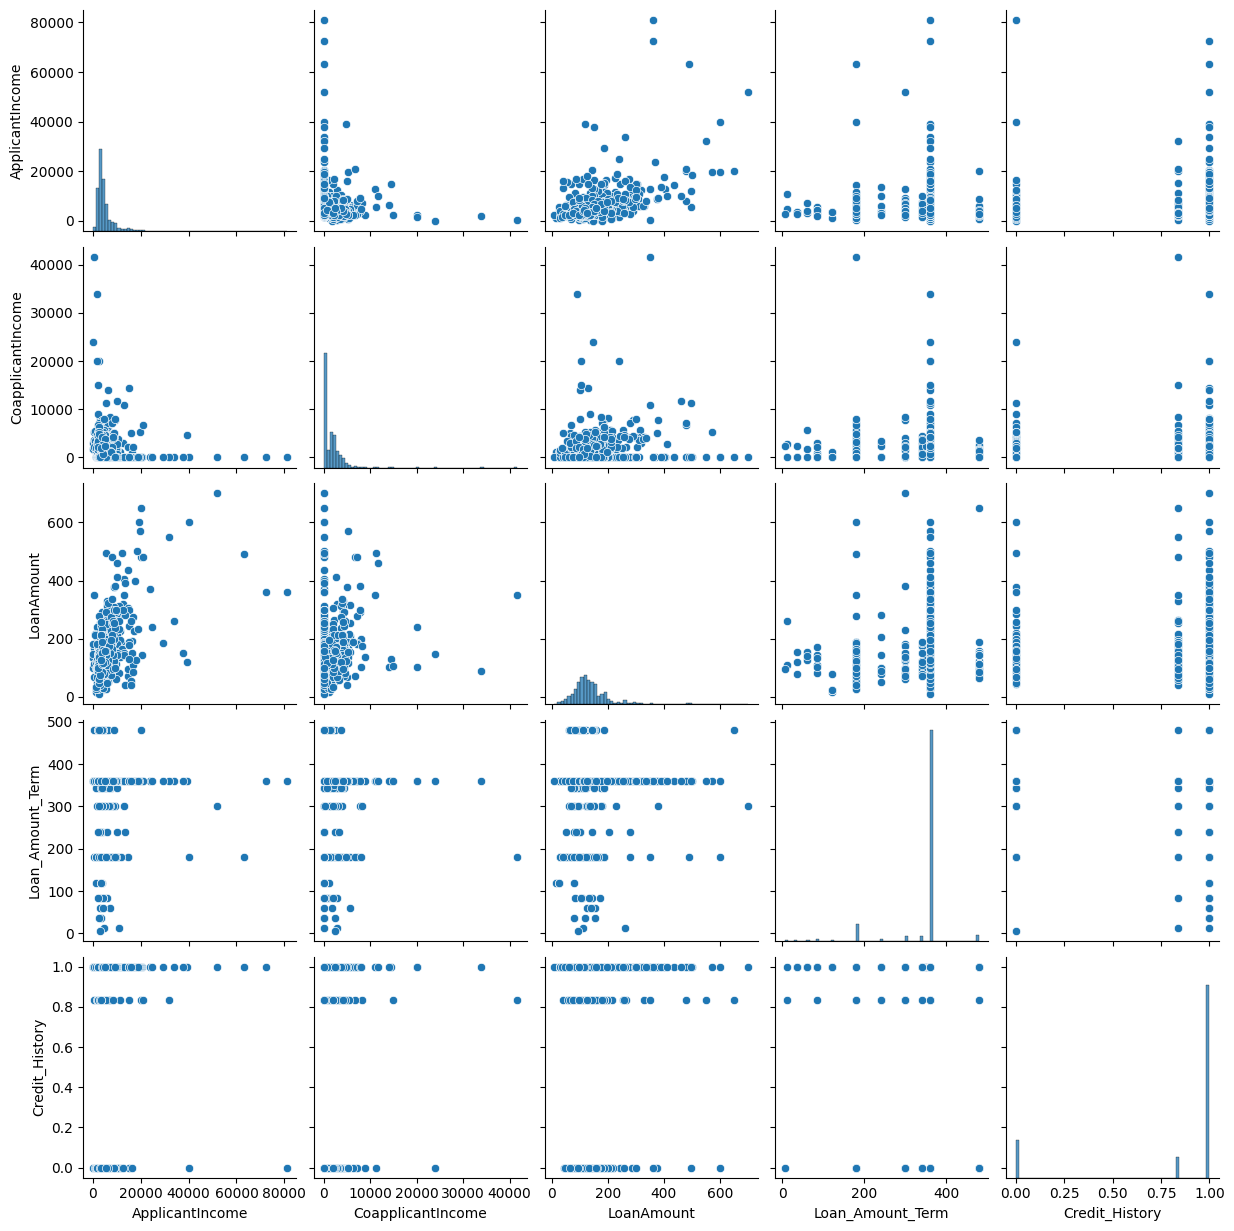

In [15]:
sns.pairplot(df)

<Axes: xlabel='Loan_Status', ylabel='count'>

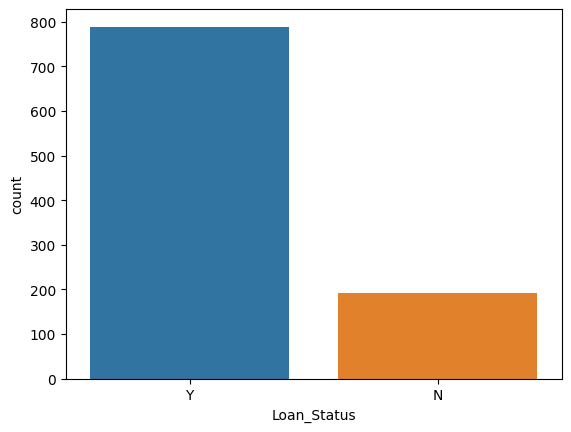

In [16]:
sns.countplot(x=df['Loan_Status'], palette='tab10')

In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Loan_Status', ylabel='count'>

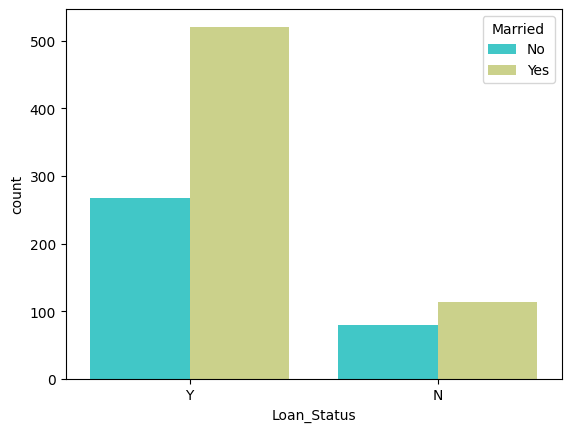

In [18]:
sns.countplot(x=df['Loan_Status'], hue=df['Married'],palette='rainbow')

<Axes: xlabel='Loan_Status', ylabel='count'>

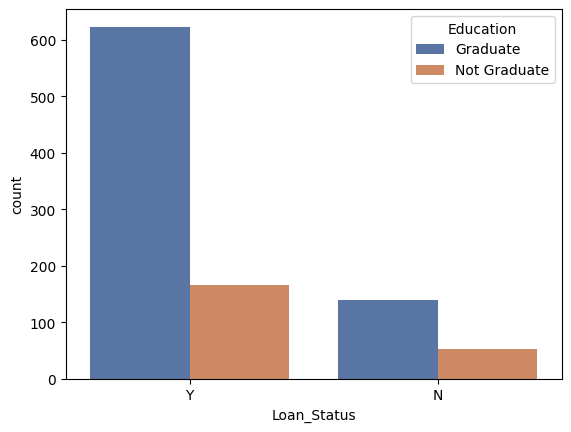

In [19]:
sns.countplot(x=df['Loan_Status'], hue=df['Education'],palette='deep')

<Axes: xlabel='Loan_Status', ylabel='count'>

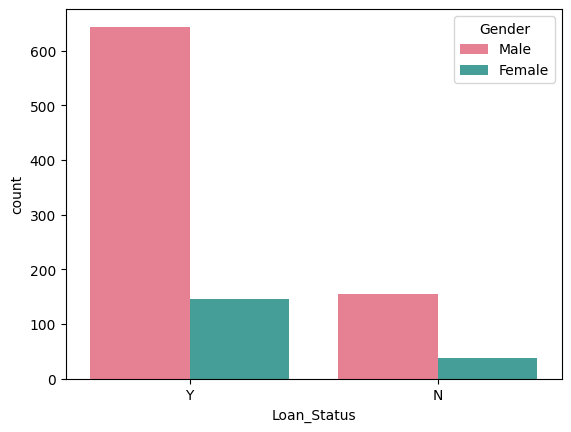

In [20]:
sns.countplot(x=df['Loan_Status'], hue=df['Gender'],palette='husl')

In [21]:
df['Dependents'].value_counts()

Dependents
0     570
1     160
2     160
3+     91
Name: count, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

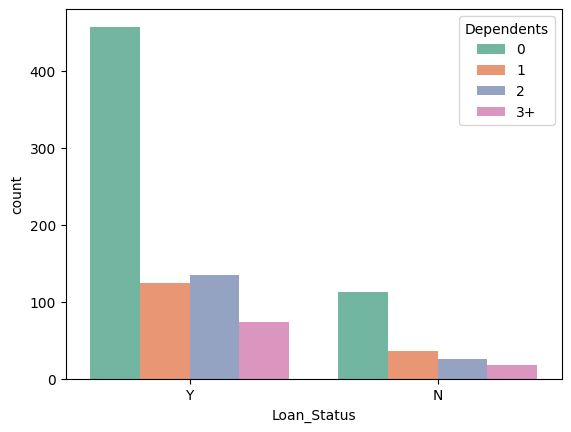

In [22]:
sns.countplot(x=df['Loan_Status'], hue=df['Dependents'],palette='Set2')

<Axes: xlabel='Dependents', ylabel='Count'>

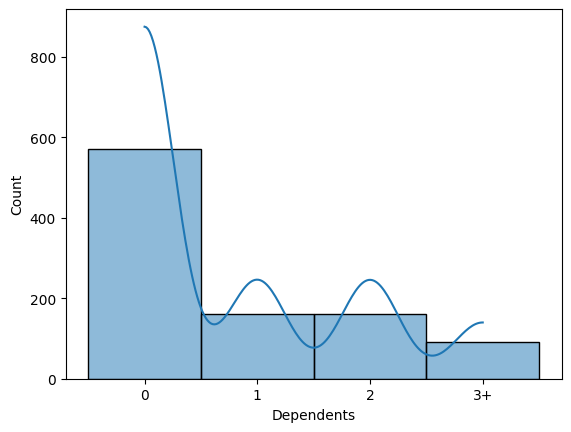

In [23]:
sns.histplot(df['Dependents'],kde=True)

<Axes: xlabel='Loan_Status', ylabel='count'>

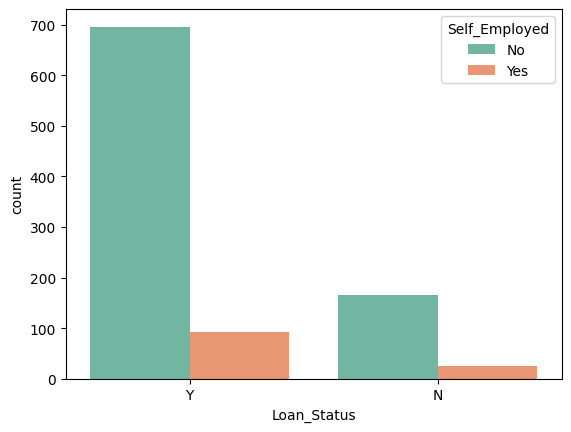

In [24]:
sns.countplot(x=df['Loan_Status'], hue=df['Self_Employed'],palette='Set2')

<Axes: ylabel='CoapplicantIncome'>

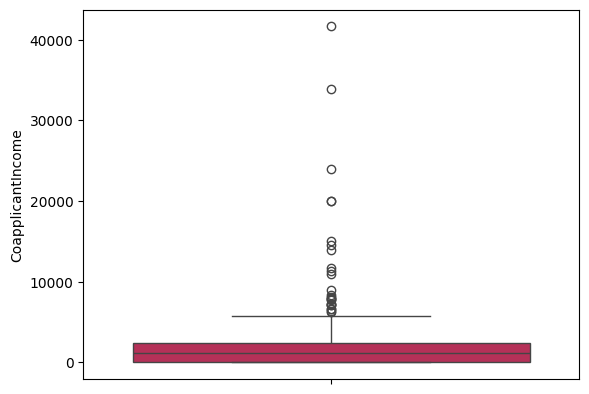

In [25]:
sns.boxplot(df['CoapplicantIncome'], palette='rocket')

<Axes: ylabel='LoanAmount'>

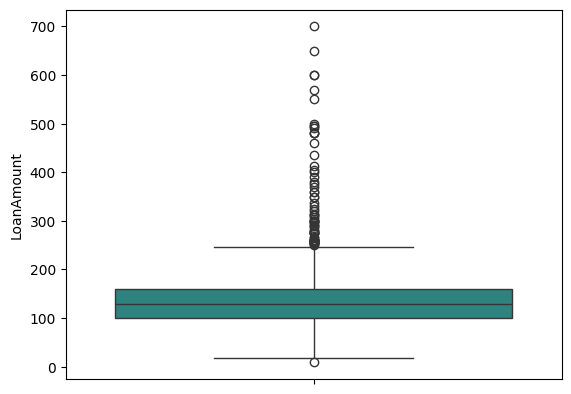

In [26]:
sns.boxplot(df['LoanAmount'], palette='viridis')

<Axes: >

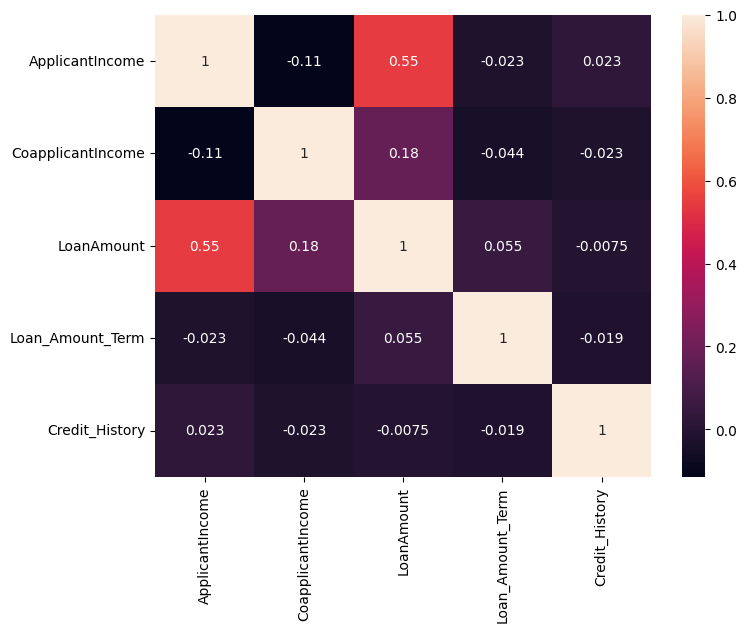

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [28]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
df.drop('Loan_ID', axis=1, inplace=True)

In [30]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [31]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          981 non-null    int64  
 1   CoapplicantIncome        981 non-null    float64
 2   LoanAmount               981 non-null    float64
 3   Loan_Amount_Term         981 non-null    float64
 4   Credit_History           981 non-null    float64
 5   Gender_Male              981 non-null    bool   
 6   Married_Yes              981 non-null    bool   
 7   Dependents_1             981 non-null    bool   
 8   Dependents_2             981 non-null    bool   
 9   Dependents_3+            981 non-null    bool   
 10  Education_Not Graduate   981 non-null    bool   
 11  Self_Employed_Yes        981 non-null    bool   
 12  Property_Area_Semiurban  981 non-null    bool   
 13  Property_Area_Urban      981 non-null    bool   
 14  Loan_Status_Y            9

In [32]:
df_encoded.astype(int)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0,142,360,1,1,0,0,0,0,0,0,0,1,1
1,4583,1508,128,360,1,1,1,1,0,0,0,0,0,0,0
2,3000,0,66,360,1,1,1,0,0,0,0,1,0,1,1
3,2583,2358,120,360,1,1,1,0,0,0,1,0,0,1,1
4,6000,0,141,360,1,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,4009,1777,113,360,1,1,1,0,0,1,1,1,0,1,1
977,4158,709,115,360,1,1,1,0,0,0,0,0,0,1,1
978,3250,1993,126,360,0,1,0,0,0,0,0,0,1,0,1
979,5000,2393,158,360,1,1,1,0,0,0,0,0,0,0,1


In [33]:
X = df_encoded.drop('Loan_Status_Y',axis=1)
y = df_encoded['Loan_Status_Y']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.22, random_state=42)

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [38]:
y_pred = model.predict(X_test)

In [39]:
acc = accuracy_score(y_test, y_pred)
acc

0.7962962962962963

In [40]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.7916666666666666

In [41]:
model = SVC(kernel='rbf', gamma=0.5, C=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.8009259259259259

In [42]:
model = GaussianNB(priors=None, var_smoothing=1e-09)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.8009259259259259

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [44]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth=1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.8101851851851852

In [45]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.8101851851851852

In [46]:
model = XGBClassifier(learning_rate=0.1,     
    max_depth=6,            
    n_estimators=100,      
    subsample=0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.7824074074074074

In [47]:
models_params = {
    'Logistic Regression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression())
        ]),
        'params': {
            'clf__C': [0.01, 0.1, 1, 10, 100],
            'clf__penalty': ['l2'],
            'clf__solver': ['liblinear']
        }
    },
    'KNN': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', KNeighborsClassifier())
        ]),
        'params': {
            'clf__n_neighbors': [3, 5, 7, 9],
            'clf__weights': ['uniform', 'distance']
        }
    },
    'SVM': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC())
        ]),
        'params': {
            'clf__C': [0.1, 1, 10],
            'clf__kernel': ['linear', 'rbf'],
            'clf__gamma': ['scale', 'auto']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-09, 1e-08, 1e-07]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

for name, mp in models_params.items():
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Best Score (CV)': grid.best_score_,
        'Test Accuracy': acc,
        'Best Params': grid.best_params_
    })

# Sort by accuracy
results_df = pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False)
results_df


,Model,Best Score (CV),Test Accuracy,Best Params
2,SVM,0.821419,0.817259,"{'clf__C': 1, 'clf__gamma': 'scale', 'clf__ker..."
5,Random Forest,0.820162,0.817259,"{'max_depth': 10, 'min_samples_split': 5, 'n_e..."
0,Logistic Regression,0.820186,0.802030,"{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__so..."
1,KNN,0.818880,0.802030,"{'clf__n_neighbors': 9, 'clf__weights': 'dista..."
6,XGBoost,0.818871,0.802030,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
4,Decision Tree,0.813784,0.791878,"{'max_depth': 5, 'min_samples_split': 10}"
3,Naive Bayes,0.803626,0.791878,{'var_smoothing': 1e-09}


In [49]:
import joblib

# Assume you already have:
# - X (features)
# - y (target)
# - scaler (already fitted or fit it below)
# - models_params = {'logisticRegression': {'model': LogisticRegression(), 'params': {...}}, ...}

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (Optional) Scale the data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_model = None
best_score = 0
best_name = ""
best_grid = None

# Grid search all models
for name, mp in models_params.items():
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    
    model = grid.best_estimator_
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    if acc > best_score:
        best_model = model
        best_score = acc
        best_name = name
        best_grid = grid

# ✅ Save best model and assets
joblib.dump(best_model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "columns.pkl")

print(f"✅ Best model '{best_name}' saved with accuracy: {best_score:.4f}")


✅ Best model 'Random Forest' saved with accuracy: 0.8223


In [50]:
# If your target variable was encoded like 0 → No, 1 → Yes
# and you used a label encoder:
joblib.dump('label_encoder', "label_encoder.pkl")


['label_encoder.pkl']